# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multiplatform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via `gnuplot` from the IPython command line.
IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.
John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you desire.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like `ggplot` and `ggvis` in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [`ggpy`](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

# General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

## Importing Matplotlib

Just as we use the `np` shorthand for NumPy and the `pd` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The `plt` interface is what we will use most often, as you shall see throughout this part of the book.

## show or No show? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in a Jupyter notebook.

### Plotting from a Script

If you are using Matplotlib from within a script, the function `plt.show` is your friend.
`plt.show` starts an event loop, looks for all currently active `Figure` objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# file: myplot.py
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The `plt.show` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but Matplotlib does its best to hide all these details from you.

One thing to be aware of: the `plt.show` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple `show` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

### Plotting from a Jupyter Notebook

The Jupyter notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).

Plotting interactively within a Jupyter notebook can be done with the `%matplotlib` command, and works in a similar way to the IPython shell.
You also have the option of embedding graphics directly in the notebook, with two possible options:

- `%matplotlib inline` will lead to *static* images of your plot embedded in the notebook.
- `%matplotlib notebook` will lead to *interactive* plots embedded within the notebook.

For this book, we will generally stick with the default, with figures rendered as static images (see the following figure for the result of this basic plotting example):

In [ ]:
%matplotlib inline

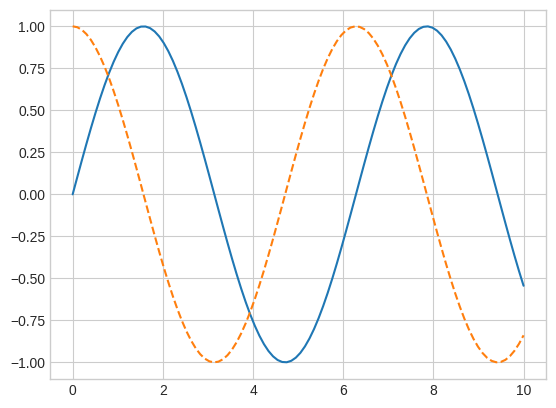

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the `savefig` command.
For example, to save the previous figure as a PNG file, we can run this:

In [ ]:
fig.savefig('my_figure.png')

We now have a file called *my_figure.png* in the current working directory:

#### MATLAB-style Interface

Matplotlib was originally conceived as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the `pyplot` (`plt`) interface.
For example, the following code will probably look quite familiar to MATLAB users (the following figure shows the result):

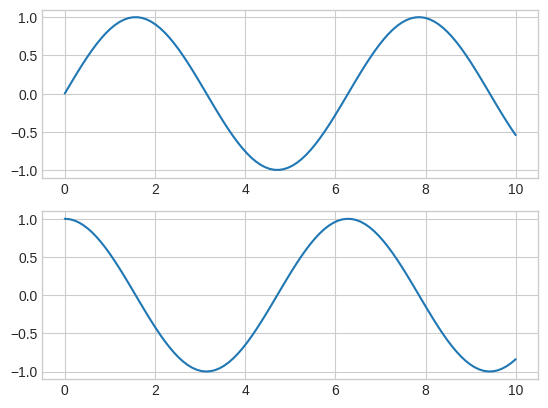

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to recognize that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all `plt` commands are applied.
You can get a reference to these using the `plt.gcf` (get current figure) and `plt.gca` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As in all the following chapters, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-126-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


For all Matplotlib plots, we start by creating a figure and axes.
In their simplest form, this can be done as follows (see the following figure):

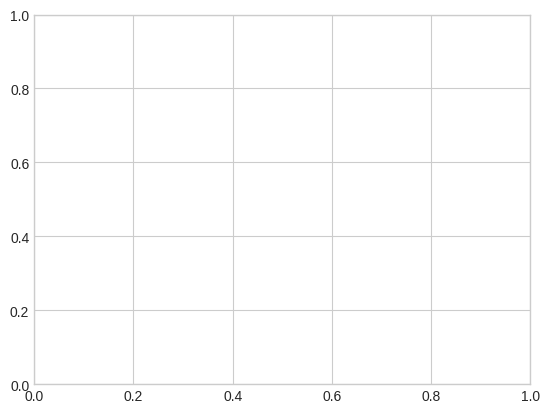

In [ ]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks, grids, and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this part of the book, I'll commonly use the variable name `fig` to refer to a figure instance and `ax` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the `ax.plot` method to plot some data. Let's start with a simple sinusoid, as shown in the following figure:

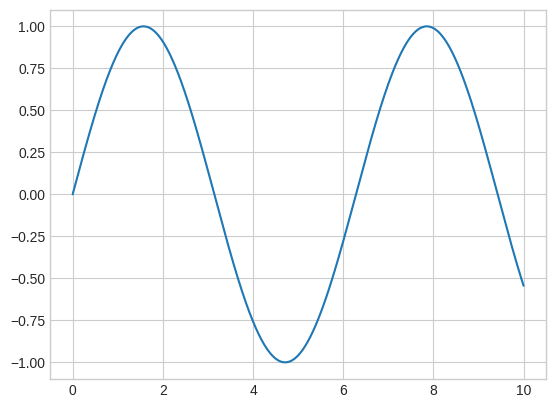

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

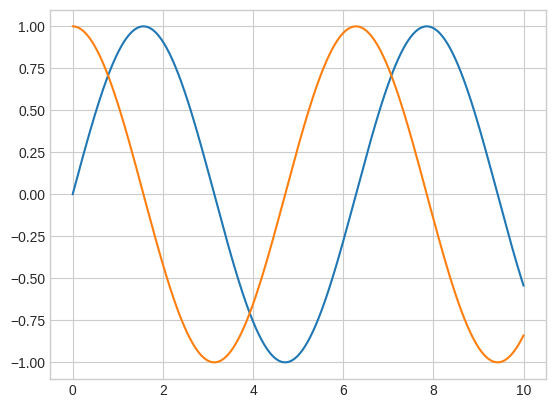

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The `plt.plot` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways; see the following figure for the output of the following examples:

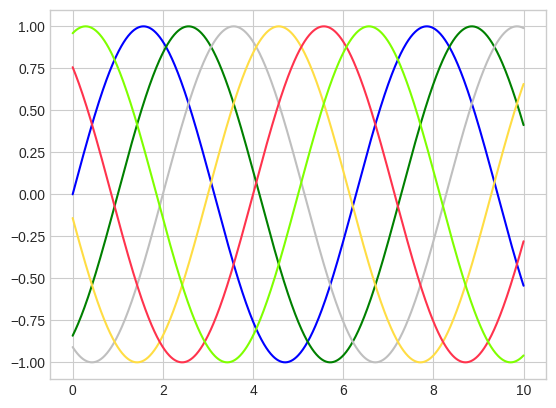

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # hex code (RRGGBB, 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the `linestyle` keyword (see the following figure):

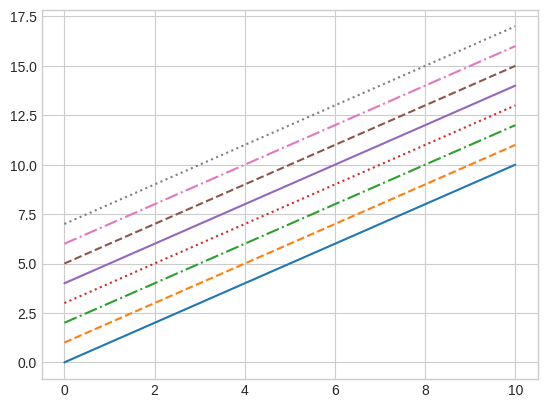

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Though it may be less clear to someone reading your code, you can save some keystrokes by combining these `linestyle` and `color` codes into a single non-keyword argument to the `plt.plot` function; the following figure shows the result:

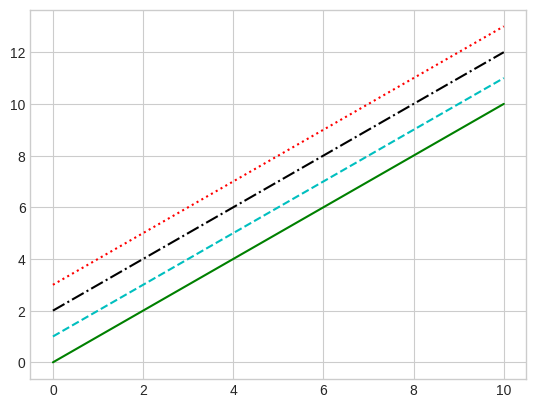

In [ ]:
plt.plot(x, x + 0, '-g')   # solid green
plt.plot(x, x + 1, '--c')  # dashed cyan
plt.plot(x, x + 2, '-.k')  # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for details, read through the docstring of the `plt.plot` function using IPython's help tools (see [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)).

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust the limits is to use the `plt.xlim` and `plt.ylim` functions (see the following figure):

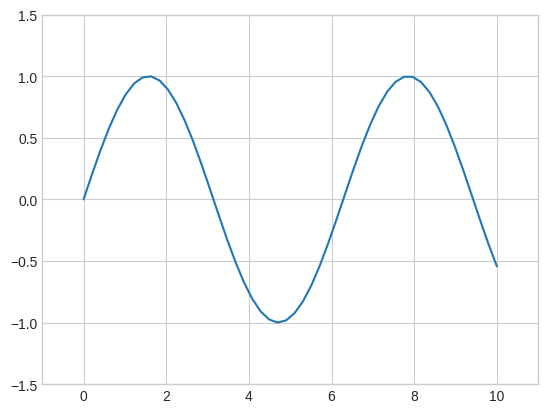

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

## Labeling Plots

As the last piece of this chapter, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.
Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them (see the following figure):

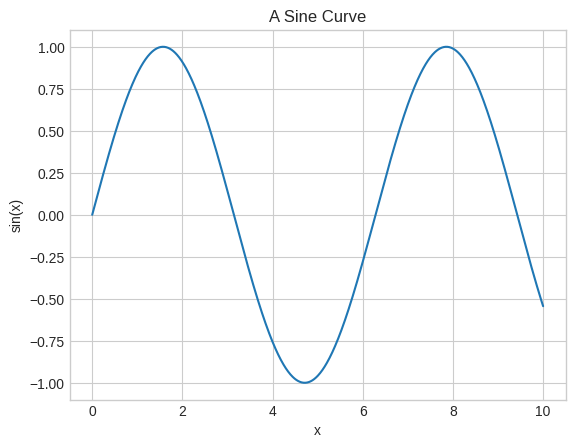

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the functions, described in the docstrings.

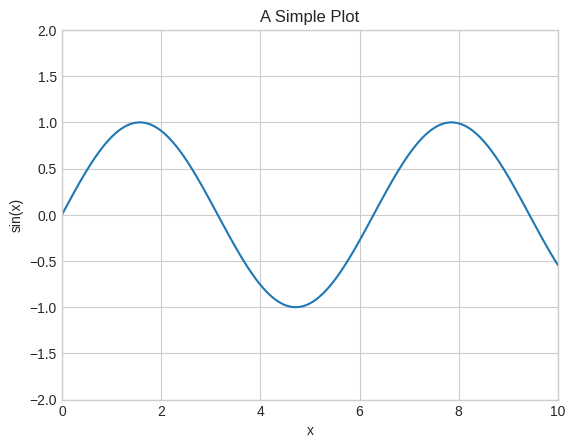

In [ ]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the packages we will use:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-136-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Scatter Plots with plt.plot

In the previous chapter we looked at using `plt.plot`/`ax.plot` to produce line plots.
It turns out that this same function can produce scatter plots as well (see the following figure):

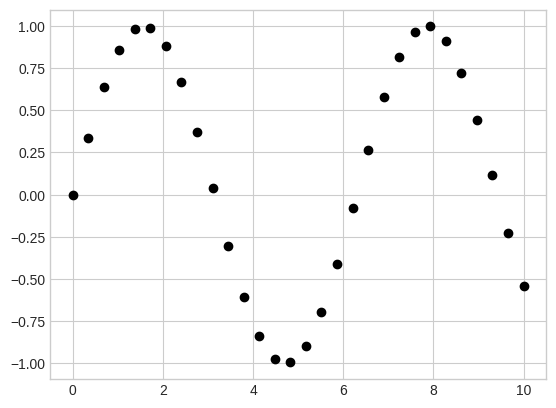

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them (see the following figure):

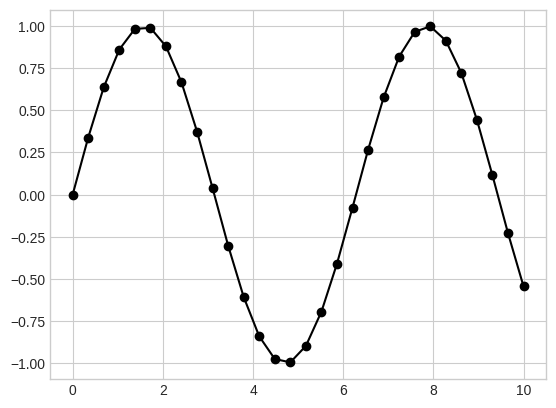

In [ ]:
plt.plot(x, y, '-ok');

Additional keyword arguments to `plt.plot` specify a wide range of properties of the lines and markers, as you can see in the following figure:

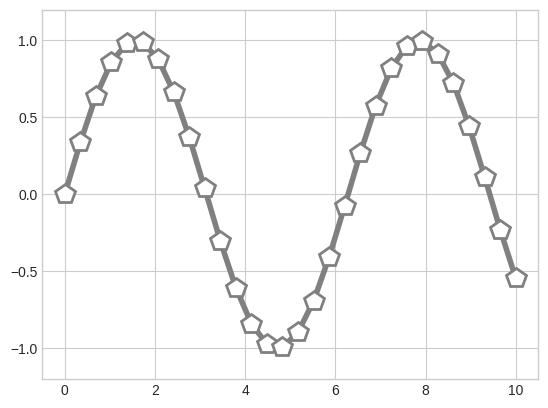

In [ ]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

These kinds of options make `plt.plot` the primary workhorse for two-dimensional plots in Matplotlib.
For a full description of the options available, refer to the [`plt.plot` documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html).

## Scatter Plots with plt.scatter

A second, more powerful method of creating scatter plots is the `plt.scatter` function, which can be used very similarly to the `plt.plot` function (see the following figure):

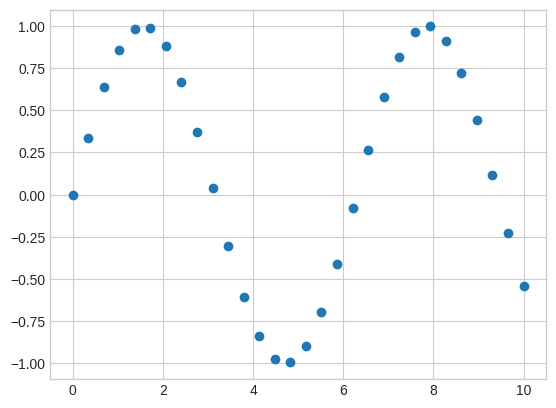

In [ ]:
plt.scatter(x, y, marker='o');

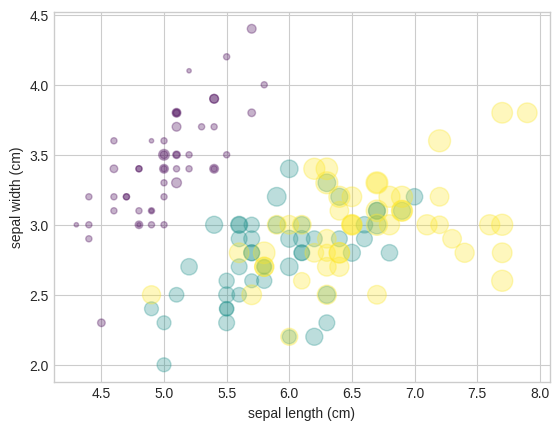

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.3,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

A full-color version of this plot is available in the [online version](http://github.com/jakevdp/PythonDataScienceHandbook) of the book.

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (*x*, *y*) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

# Visualizing Uncertainties

For any scientific measurement, accurate accounting of uncertainties is nearly as important, if not more so, as accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 70 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of 70 ± 2.5 (km/s)/Mpc, and my method has measured a value of 74 ± 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars

One standard way to visualize uncertainties is using an errorbar. A basic errorbar can be created with a single Matplotlib function call, as shown in the following figure:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-142-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


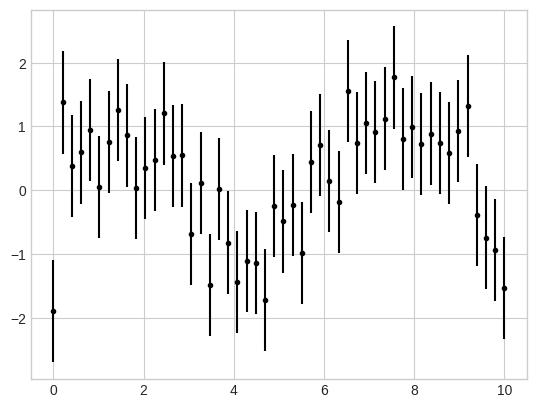

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is a format code controlling the appearance of lines and points, and it has the same syntax as the shorthand used in `plt.plot`, outlined in the previous chapter and earlier in this chapter.

In addition to these basic options, the `errorbar` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves (see the following figure):

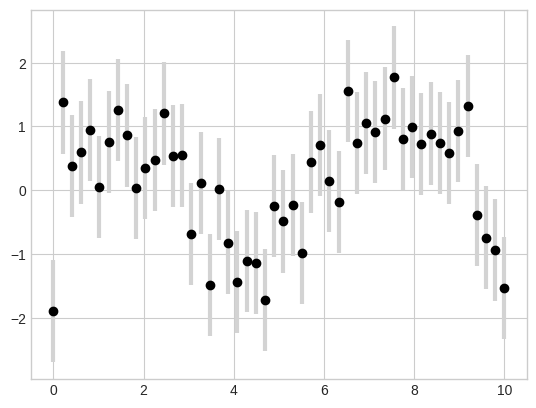

In [ ]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars, one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of `plt.errorbar`.

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantities.
Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like `plt.plot` and `plt.fill_between` for a useful result.

Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API (see [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb) for details).
This is a method of fitting a very flexible nonparametric function to data with a continuous measure of the uncertainty.
We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

We now have `xfit`, `yfit`, and `dyfit`, which sample the continuous fit to our data.
We could pass these to the `plt.errorbar` function as in the previous section, but we don't really want to plot 1,000 points with 1,000 errorbars.
Instead, we can use the `plt.fill_between` function with a light color to visualize this continuous error (see the following figure):

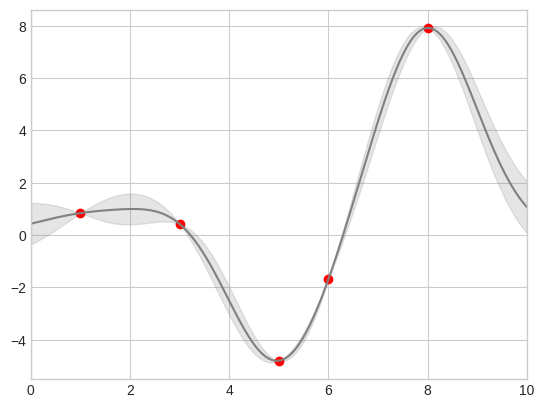

In [ ]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Take a look at the `fill_between` call signature: we pass an x value, then the lower *y*-bound, then the upper *y*-bound, and the result is that the area between these regions is filled.

The resulting figure gives an intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained, and this is reflected in the small model uncertainties.
In regions far from a measured data point, the model is not strongly constrained, and the model uncertainties increase.

For more information on the options available in `plt.fill_between` (and the closely related `plt.fill` function), see the function docstring or the Matplotlib documentation.

Finally, if this seems a bit too low-level for your taste, refer to [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), where we discuss the Seaborn package, which has a more streamlined API for visualizing this type of continuous errorbar.